## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../../data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [2]:
print(df.mean())

print(df.var())

df.describe()

AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64
AGE     171.846610
SEX       0.249561
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
Y      5943.331348
dtype: float64


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

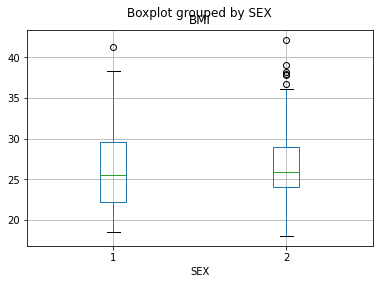

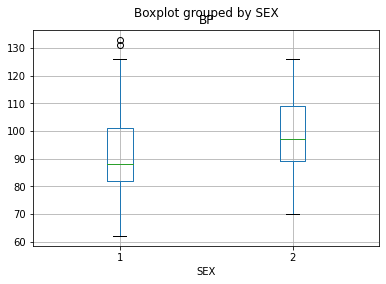

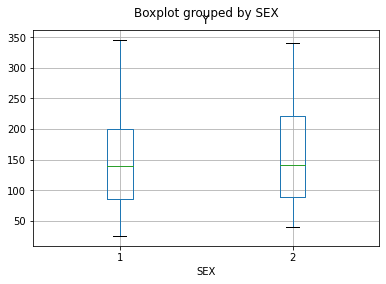

In [3]:
for col in ["BMI","BP","Y"]:
    df.boxplot(column=col, by="SEX")
    






### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SEX'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Y'}>]], dtype=object)

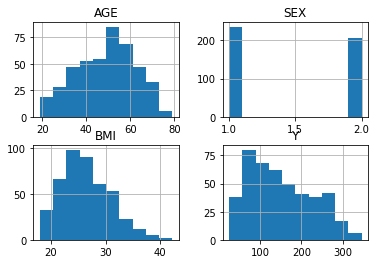

In [4]:
df.hist(column=["AGE","SEX","BMI","Y"])
#Age= normal
#Sex = Uniform
#BMI,Y = Gamma Distribution

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [5]:
df.corr()["Y"].sort_values(ascending=False)

Y      1.000000
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
S3    -0.394789
Name: Y, dtype: float64

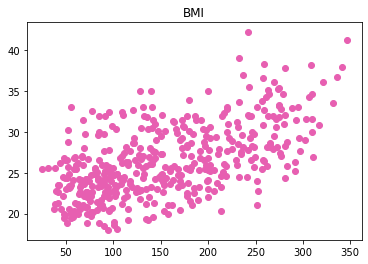

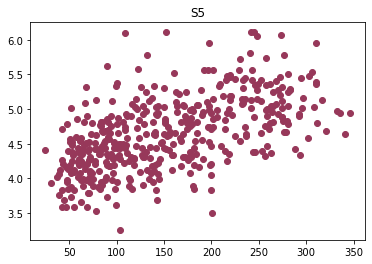

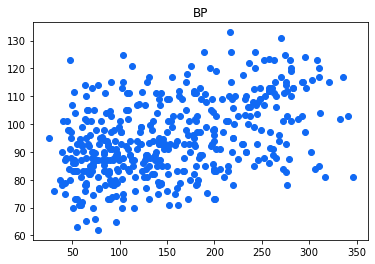

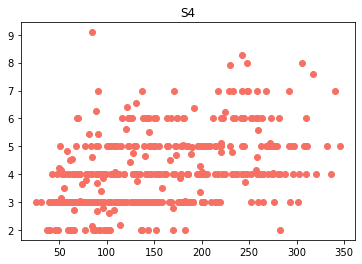

In [6]:
for i in df.corr()["Y"].sort_values(ascending=False).index[1:5]:
    plt.title(i)
    plt.scatter(df["Y"],df[i],color = np.random.rand(3))
    plt.show()

The most correlated variable to Y is MBI, then S5, BP, S4

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [8]:
from scipy.stats import ttest_ind

t_value, p_value = ttest_ind(df[df["SEX"] == 1]["Y"],df[df["SEX"] == 2]["Y"], equal_var=False)

print("t-value:",t_value)
print("p-value:",p_value)

t-value: -0.9022224453390377
p-value: 0.3674449793083975


There is nos significant diabetes progression difference between man and women